In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

# Load the dataset
file_path = "Bakery.csv"
df = pd.read_csv(file_path)

# Grouping items by transactions
transactions = df.groupby("TransactionNo")["Items"].apply(list).tolist()

# Convert transactions to vertical format (item: transaction IDs)
vertical_db = {}
for tid, items in enumerate(transactions):
    for item in items:
        if item not in vertical_db:
            vertical_db[item] = set()
        vertical_db[item].add(tid)

In [8]:
# Function to perform ECLAT
def eclat(prefix, items, min_support, freq_itemsets):
    while items:
        item, tids = items.pop()
        new_prefix = prefix + [item]
        freq_itemsets[frozenset(new_prefix)] = len(tids)

        # Generate new itemsets
        new_items = []
        for other_item, other_tids in items:
            new_tids = tids & other_tids
            if len(new_tids) >= min_support:
                new_items.append((other_item, new_tids))

        eclat(new_prefix, new_items, min_support, freq_itemsets)

# Setting minimum support
min_support = 3  # Adjust based on dataset size

# Convert vertical_db to a list for iteration
item_list = list(vertical_db.items())

# Dictionary to store frequent itemsets
freq_itemsets = {}

# Run ECLAT algorithm
eclat([], item_list, min_support, freq_itemsets)

# Convert results into a DataFrame
freq_df = pd.DataFrame({'itemsets': list(freq_itemsets.keys()), 'support': list(freq_itemsets.values())})

# Sort by support and take the top 10 itemsets
top_items = freq_df.sort_values(by='support', ascending=False).head(10)

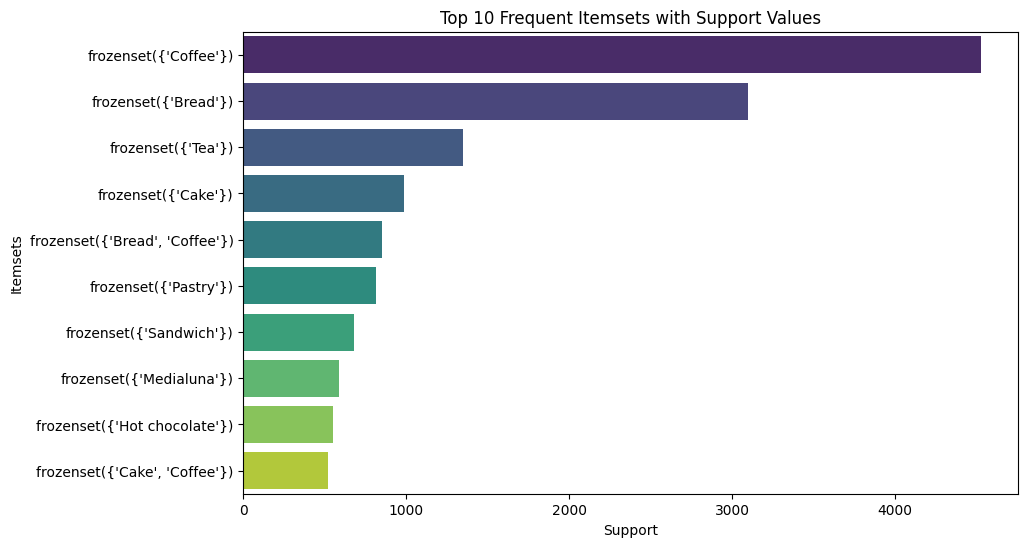

In [9]:
# Plot the top 10 frequent itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x="support", y="itemsets", hue="itemsets", data=top_items, palette="viridis", legend=False)
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.title("Top 10 Frequent Itemsets with Support Values")
plt.show()